# Hierarchical clustering
Nel seguente notebook si applica hierarchical clustering ai dati che abbiamo

In [64]:
from scipy.stats import mode
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("dataset/CS1-dataset.csv",sep='\t',decimal=",",index_col=0)
df = df.drop(columns=['CustomerID','MinD', 'MaxD','Ts'])
df.head()


,I,Iu,Imax,E,PIL,Mb,MeanD,EDate
0,1707,21,12,4.335643,2.567,156.860294,0.000000,0.000000
1,1386,105,32,6.503112,2.567,356.232222,35.000000,2.226424
2,4992,113,360,6.504979,2.752,442.969333,24.266667,2.235084
3,439,24,80,4.494680,2.567,189.650000,55.400000,1.177965
4,80,1,32,0.000000,2.567,292.000000,13.000000,0.918296


## Transformation

In [65]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#StandardScaler corrisponde allo z scaler
scaler = MinMaxScaler()
X = scaler.fit_transform(df.values)
print(X[:5])

[[8.67950446e-03 1.14025086e-02 2.29214420e-03 4.18976976e-01
  1.67671736e-01 5.78415905e-03 0.00000000e+00 0.00000000e+00]
 [7.04637379e-03 5.92930445e-02 6.45967910e-03 6.28431304e-01
  1.67671736e-01 1.31542413e-02 1.91780822e-01 9.61982496e-01]
 [2.53923838e-02 6.38540479e-02 7.48072515e-02 6.28611740e-01
  1.79798112e-01 1.63606087e-02 1.32968037e-01 9.65724206e-01]
 [2.22838391e-03 1.31128848e-02 1.64617629e-02 4.34345594e-01
  1.67671736e-01 6.99627969e-03 3.03561644e-01 5.08969615e-01]
 [4.01923126e-04 0.00000000e+00 6.45967910e-03 0.00000000e+00
  1.67671736e-01 1.07798009e-02 7.12328767e-02 3.96772868e-01]]


## Clustering
I parametri da variare sono method e metric. Truncate ci permette di non visualizzare tutti i dati, ma solo un sottoinsieme
### Complete

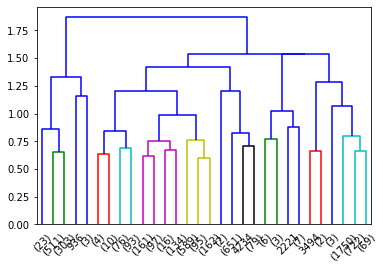

In [51]:
data_dist = pdist(X, metric='euclidean')
data_link = linkage(data_dist, method='complete', metric='euclidean')
res = dendrogram(data_link, color_threshold=0.8, truncate_mode='lastp')

### Single


In [55]:
from scipy.cluster.hierarchy import fcluster
fl = fcluster(data_link,13,criterion='maxclust')
df["cluster"] = fl

5575


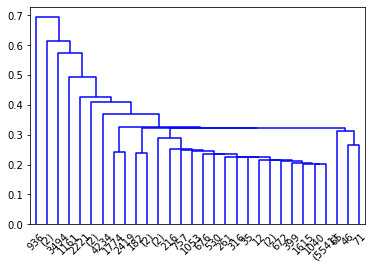

In [53]:
data_dist = pdist(X, metric='euclidean')
data_link = linkage(data_dist, method='single', metric='euclidean')
res = dendrogram(data_link, color_threshold=0.2, truncate_mode='lastp')

### Average

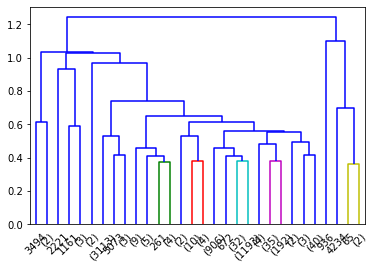

In [54]:
data_dist = pdist(X, metric='euclidean')
data_link = linkage(data_dist, method='average', metric='euclidean')
res = dendrogram(data_link, color_threshold=0.4, truncate_mode='lastp')